In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [8]:
stk_lbl = input("Enter stock label : ")
ent = input("\nEnter Start Date of the stock in (yyyy-mm-dd) format : ")
start_date = datetime.datetime.strptime(ent, "%Y-%m-%d")

try :
    df = yf.download(stk_lbl,start=start_date)
    print("Successfull in fetching the stock data.")
    df.head()
except Exeception as e:
    print("Error in fetching the stock data!")

Enter stock label :  IOB.NS

Enter Start Date of the stock in (yyyy-mm-dd) format :  2006-01-01


[*********************100%***********************]  1 of 1 completed
Successfull in fetching the stock data.


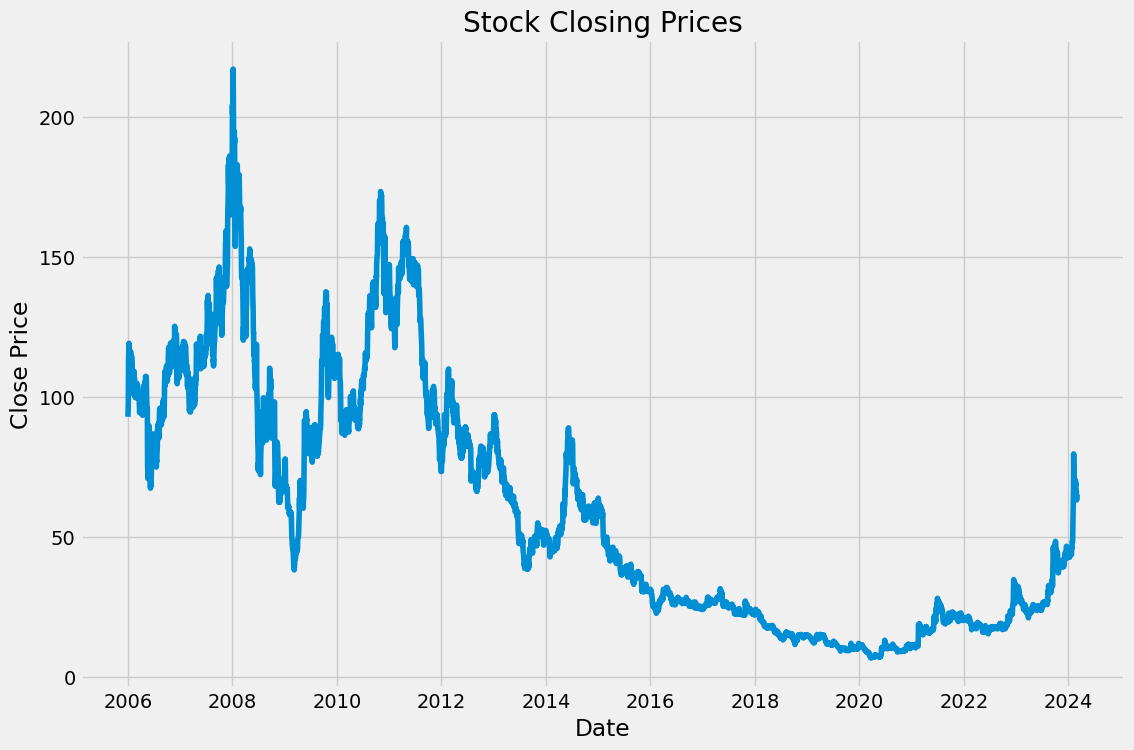

In [9]:
def visualizer(df):
    plt.figure(figsize=(12,8))
    plt.style.use('fivethirtyeight')
    plt.plot(df['Close'])
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Stock Closing Prices')
    plt.show()
    
visualizer(df)

In [10]:
df.tail(1)

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2024-03-02  64.800003  64.900002  63.799999  64.400002  64.400002  1323556

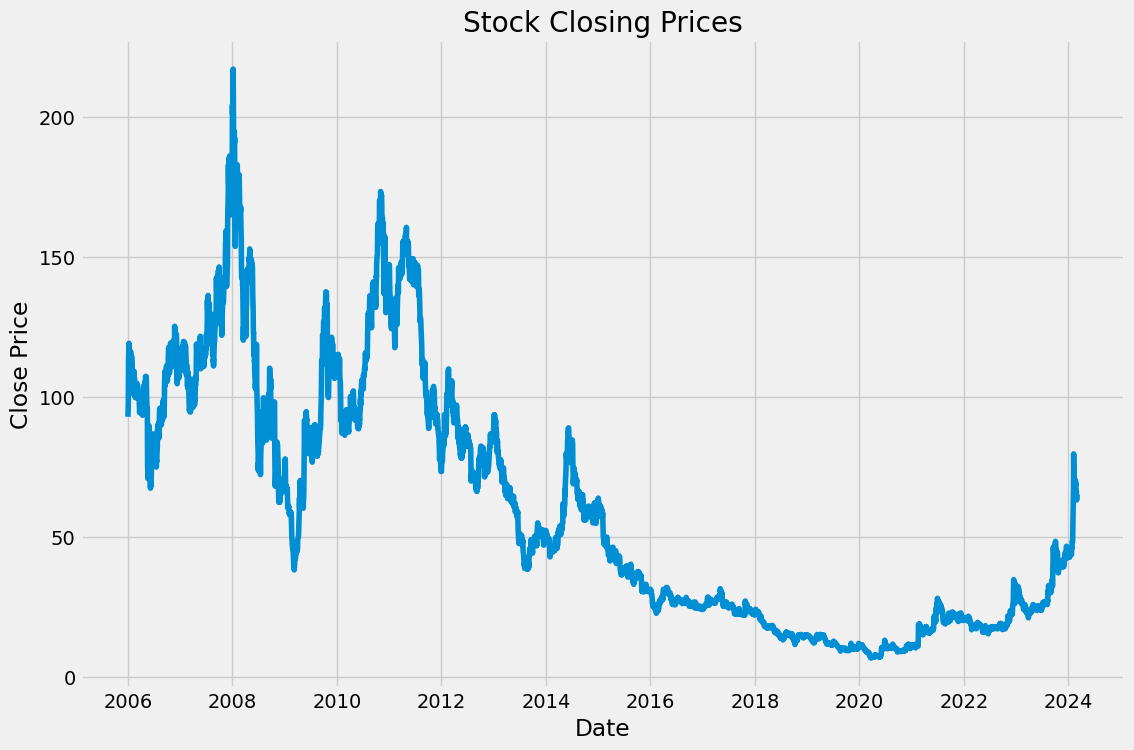

In [11]:
ndf=df.reset_index()
visualizer(df)

In [12]:
l=ndf.tail(1)
l

Date       Open       High        Low      Close  Adj Close  \
4481 2024-03-02  64.800003  64.900002  63.799999  64.400002  64.400002   

       Volume  
4481  1323556

In [13]:
last_row = df.iloc[-1].tolist()
last_row

[64.80000305175781,
 64.9000015258789,
 63.79999923706055,
 64.4000015258789,
 64.4000015258789,
 1323556.0]

In [14]:
last_row[1]

64.9000015258789

In [15]:
def fibanocci_level_retracements(l):
    high = l[1]
    low = l[2]
    close = l[3]
    base_pivot = (high+low+close)/3
    s1 = base_pivot - (0.382*(high-low))
    s2 = base_pivot - (0.618*(high-low))
    s3 = base_pivot - (1*(high-low))
    r1 = base_pivot + (0.382*(high-low))
    r2 = base_pivot + (0.618*(high-low))
    r3 = base_pivot + (1*(high-low))
    t = [base_pivot,s1,s2,s3,r1,r2,r3]
    return t
j=fibanocci_level_retracements(last_row)

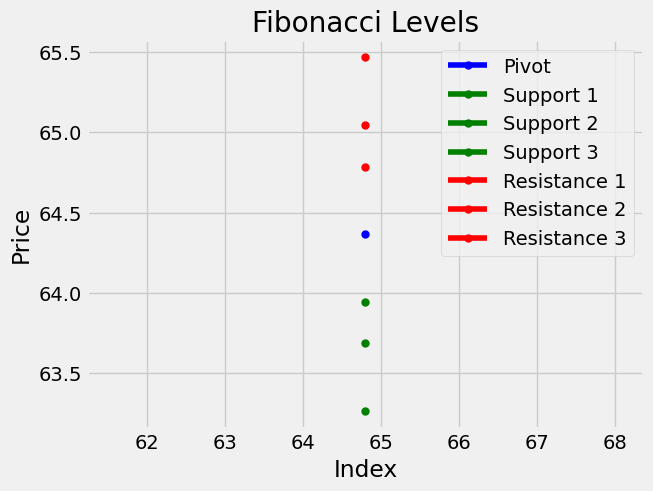

In [16]:

plt.plot(last_row[0], j[0], marker='o', markersize=5, color='blue', label='Pivot')
plt.plot(last_row[0], j[1], marker='o', markersize=5, color='green', label='Support 1')
plt.plot(last_row[0], j[2], marker='o', markersize=5, color='green', label='Support 2')
plt.plot(last_row[0], j[3], marker='o', markersize=5, color='green', label='Support 3')
plt.plot(last_row[0], j[4], marker='o', markersize=5, color='red', label='Resistance 1')
plt.plot(last_row[0], j[5], marker='o', markersize=5, color='red', label='Resistance 2')
plt.plot(last_row[0], j[6], marker='o', markersize=5, color='red', label='Resistance 3')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Fibonacci Levels')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [17]:
print(f"PIVOT VALUE : {j[0]}\nSUPPORT 1 : {j[1]}\nSUPPORT 2 : {j[2]}\nSupport 3 : {j[3]}\nResistance 1 : {j[4]}\nResistance 2 : {j[5]}\nResistance 3 : {j[6]}")

PIVOT VALUE : 64.36666742960612
SUPPORT 1 : 63.94646655527751
SUPPORT 2 : 63.68686601511638
Support 3 : 63.266665140787765
Resistance 1 : 64.78686830393474
Resistance 2 : 65.04646884409587
Resistance 3 : 65.46666971842448


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Figure size 640x480 with 0 Axes>

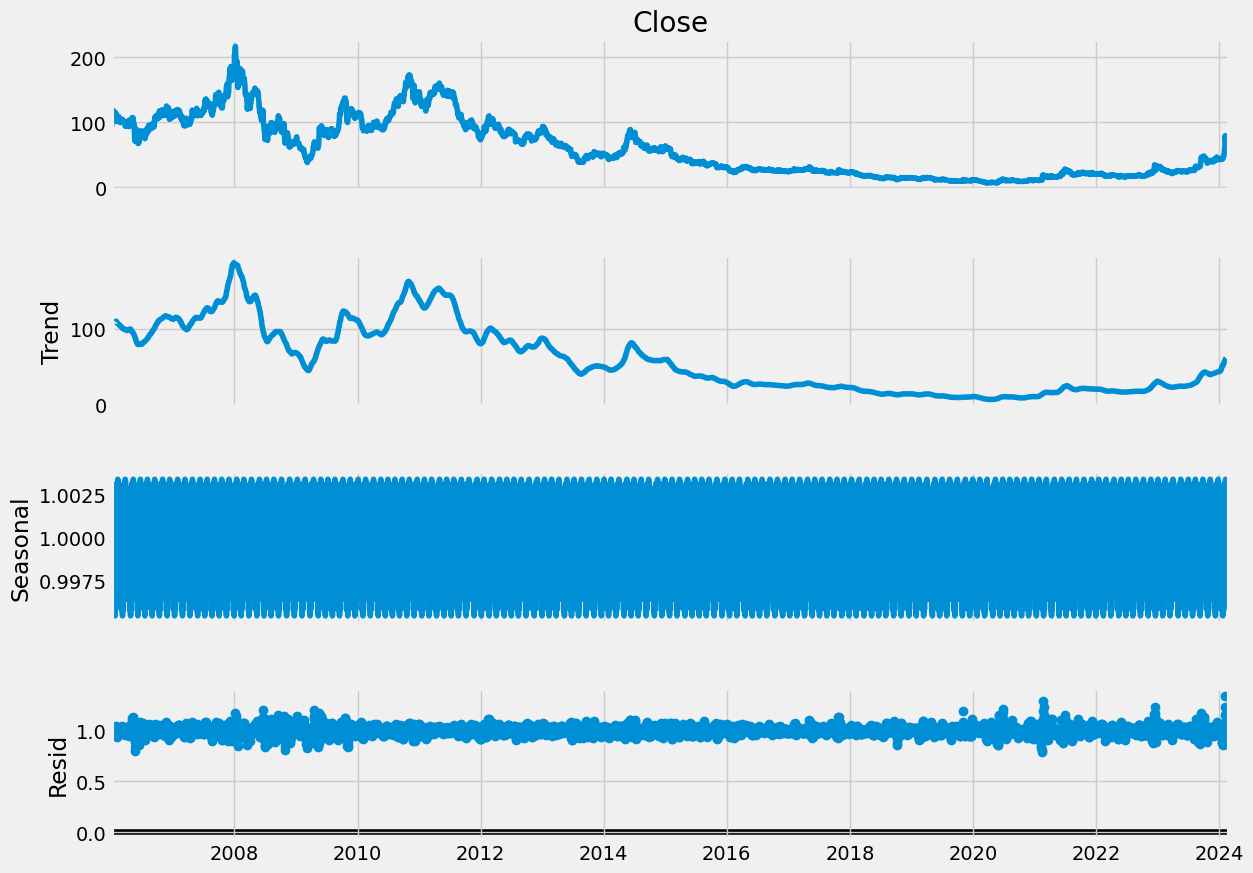

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Close"],model='multiplicative',period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)

In [19]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [20]:
df.reset_index(inplace=True)
df.head()

Date        Open        High         Low       Close  Adj Close  \
0 2006-01-02   93.800003   94.000000   92.500000   92.900002  68.456993   
1 2006-01-03   93.599998   96.000000   93.099998   94.849998  69.893936   
2 2006-01-04   96.000000   99.599998   94.699997   97.550003  71.883537   
3 2006-01-05   98.800003  106.900002   98.000000  104.900002  77.299675   
4 2006-01-06  105.250000  114.949997  105.099998  113.250000  83.452690   

    Volume  
0   255417  
1   619101  
2  1282371  
3  3581182  
4  3244671

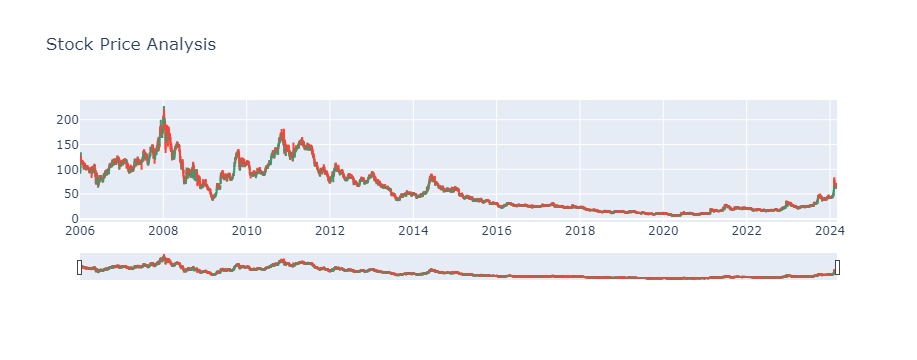

In [21]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=df['Date'],open=df["Open"], high=df["High"],low=df["Low"], close=df["Close"])])
figure.update_layout(title="Stock Price Analysis")
figure.show()

In [22]:
columns_to_drop = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
df.drop(columns=columns_to_drop, inplace=True)

In [23]:
df.head()

Date       Close
0 2006-01-02   92.900002
1 2006-01-03   94.849998
2 2006-01-04   97.550003
3 2006-01-05  104.900002
4 2006-01-06  113.250000

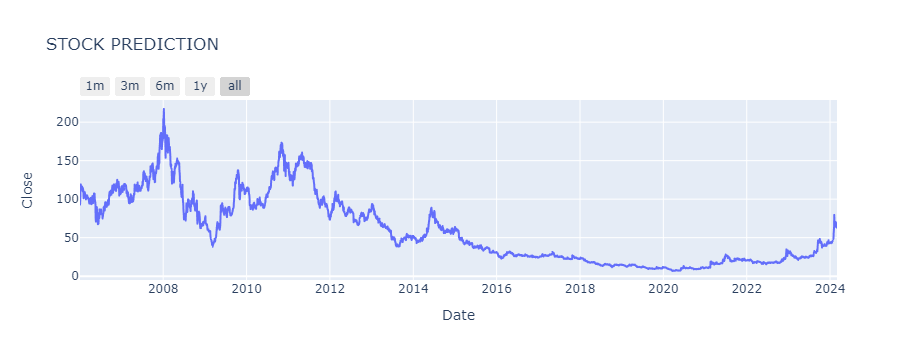

In [24]:
import plotly.express as px
figure = px.line(df, x=df["Date"], y=df["Close"], title = "STOCK PREDICTION")
figure.update_xaxes(
    rangeselector=dict(buttons=list([dict(count=1,label="1m",step="month",stepmode="backward"),
                                   dict(count=3, label="3m",step="month",stepmode="backward"),
                                   dict(count=6, label="6m",step="month",stepmode="backward"),
                                   dict(count=1, label="1y",step="year",stepmode="backward"),
                                   dict(step="all")])
                      ))

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

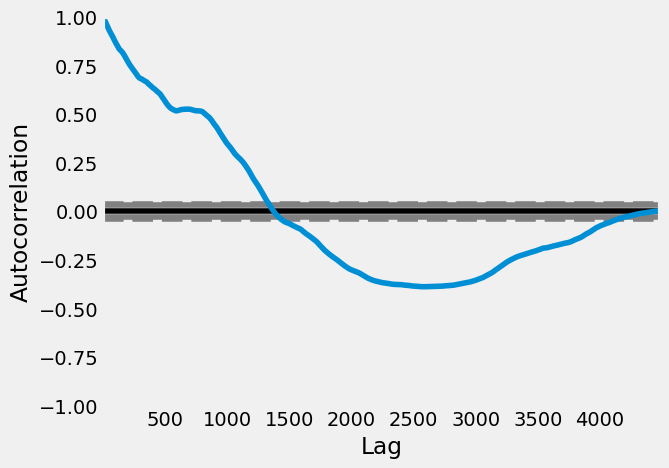

In [25]:
pd.plotting.autocorrelation_plot(df['Close'])

In [26]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.748930
p-value: 0.406095
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


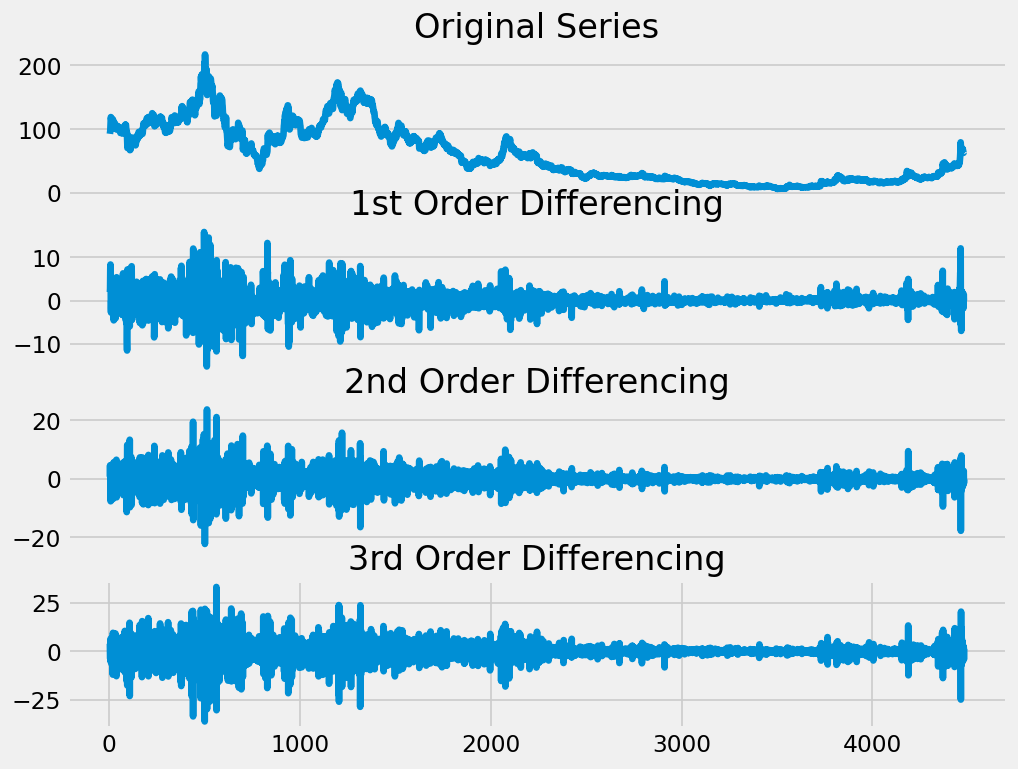

In [27]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3,ax4) = plt.subplots(4)
ax1.plot(df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df.Close.diff().diff()); ax3.set_title('2nd Order Differencing');ax3.axes.xaxis.set_visible(False)
# 3rd order differencing
ax4.plot(df.Close.diff().diff().diff());ax4.set_title('3rd Order Differencing')
plt.show()

### 1st order differencing removes the stationary from the data

### therefore d=1

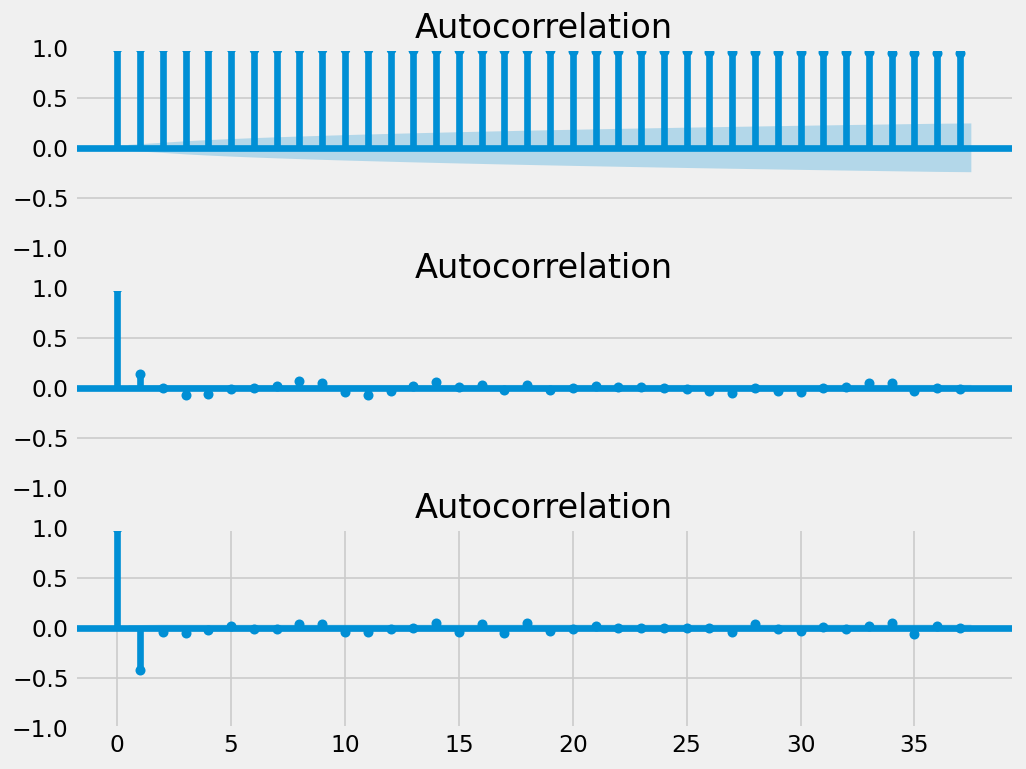

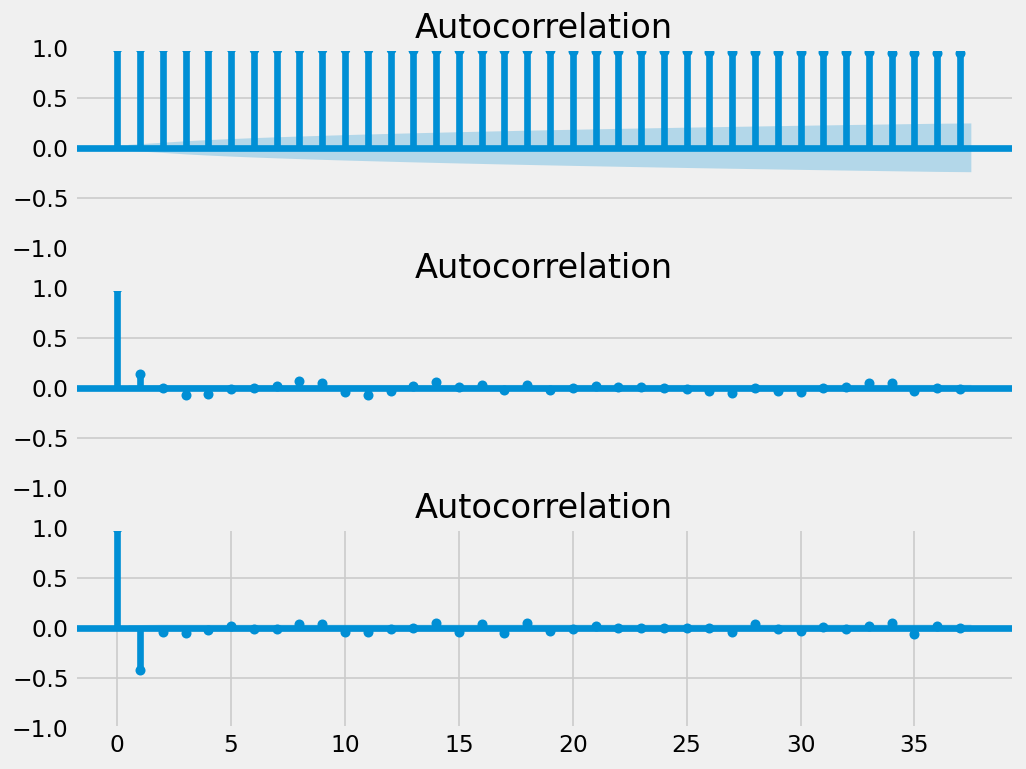

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
fig,(ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df.Close, ax=ax1);ax1.axes.xaxis.set_visible(False)
plot_acf(df.Close.diff().dropna(), ax=ax2);ax2.axes.xaxis.set_visible(False)
plot_acf(df.Close.diff().diff().dropna(), ax=ax3)

### We can see that in second order differencing there is an increase in the negative side. So, we can proceed with d=1, as first order differencing produces expected output

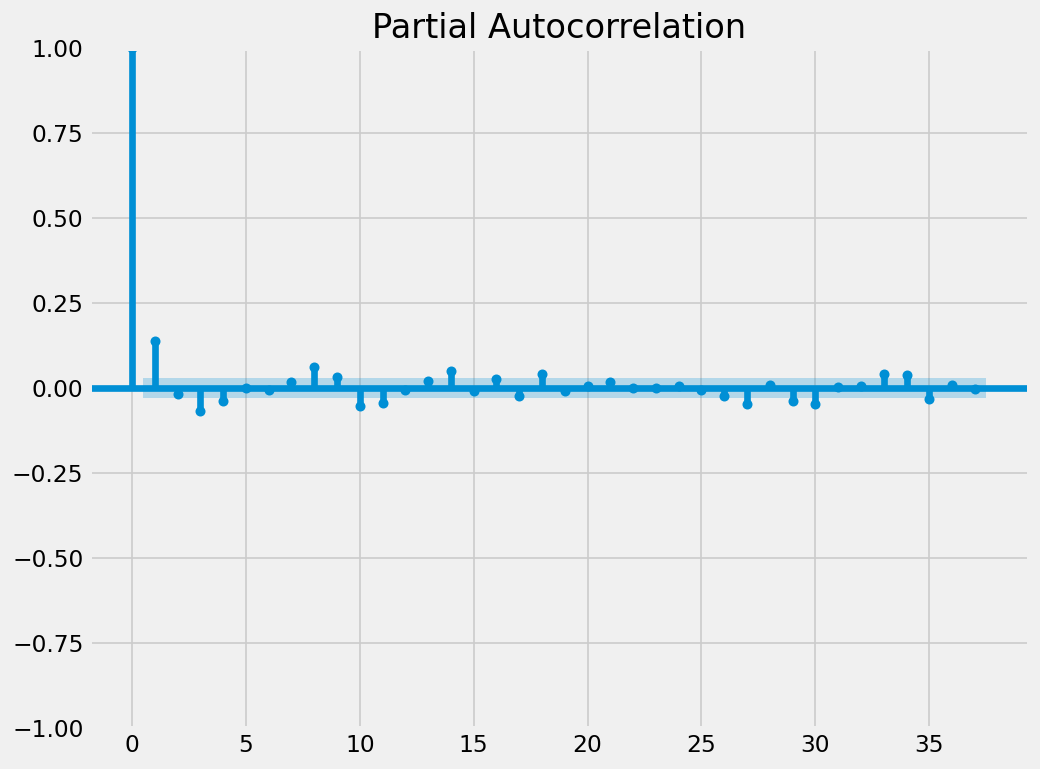

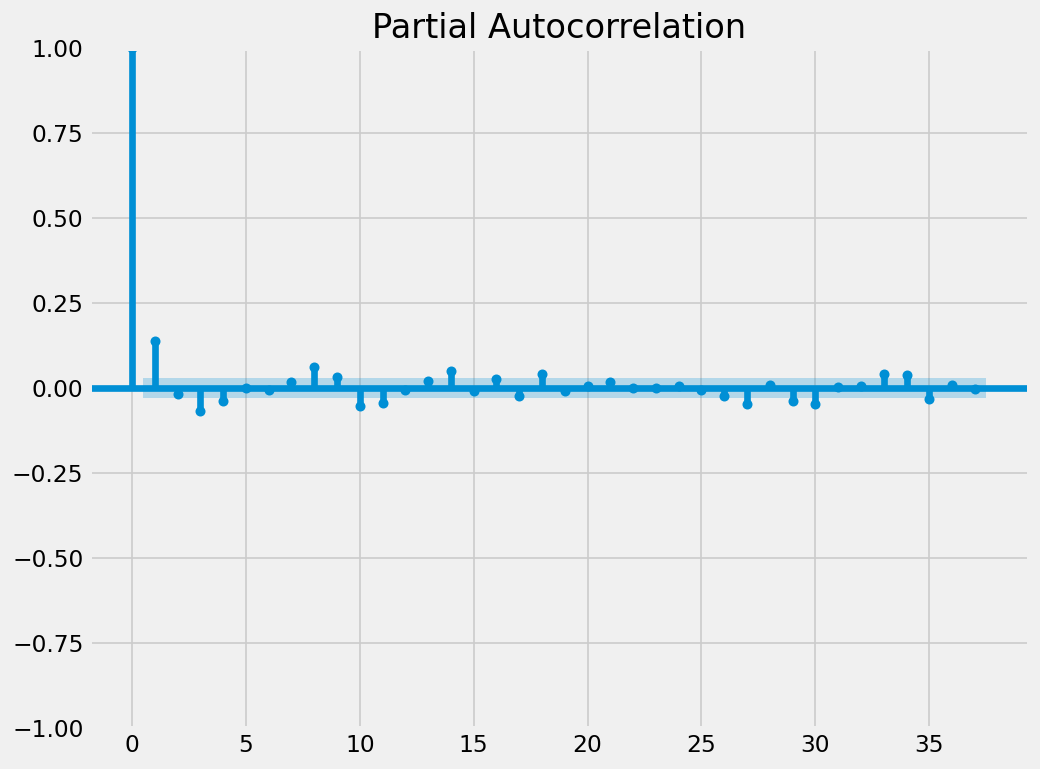

In [29]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.Close.diff().dropna())

### Here we can see that the first lag is significantly out of the limit so we can select the order of the p as 1. 

### Finding the value of the q parameter
To find out the value of q we can use the ACF plot. Which will tell us how much moving average is required to remove the autocorrelation from the stationary time series. 

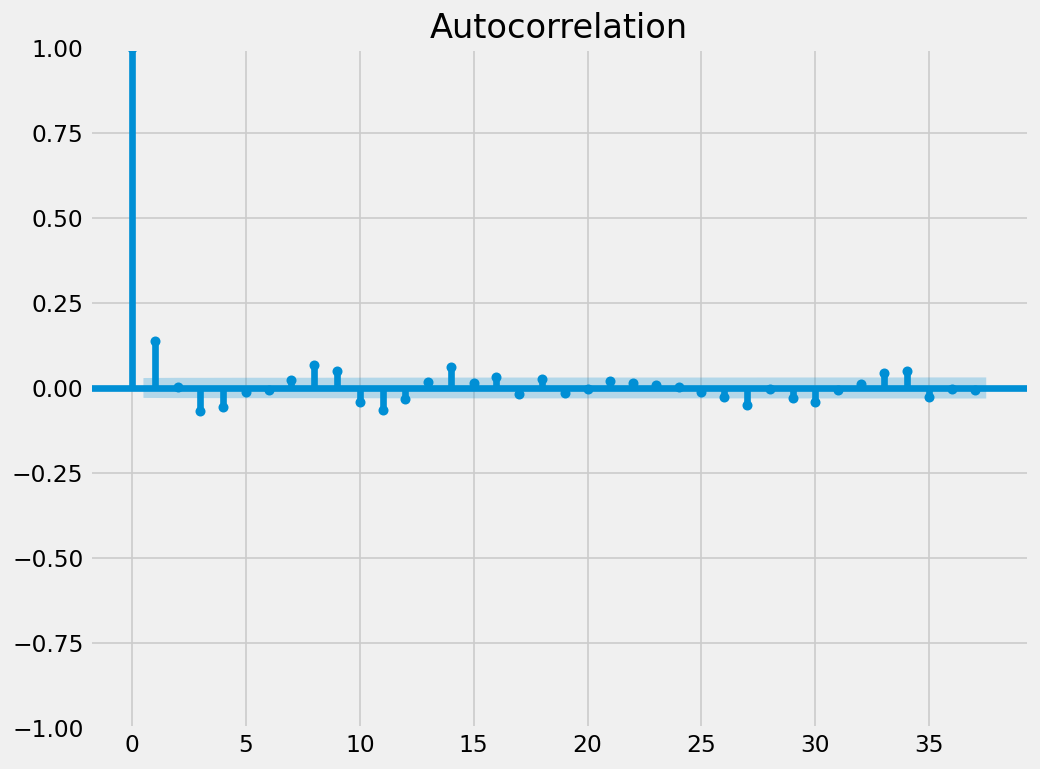

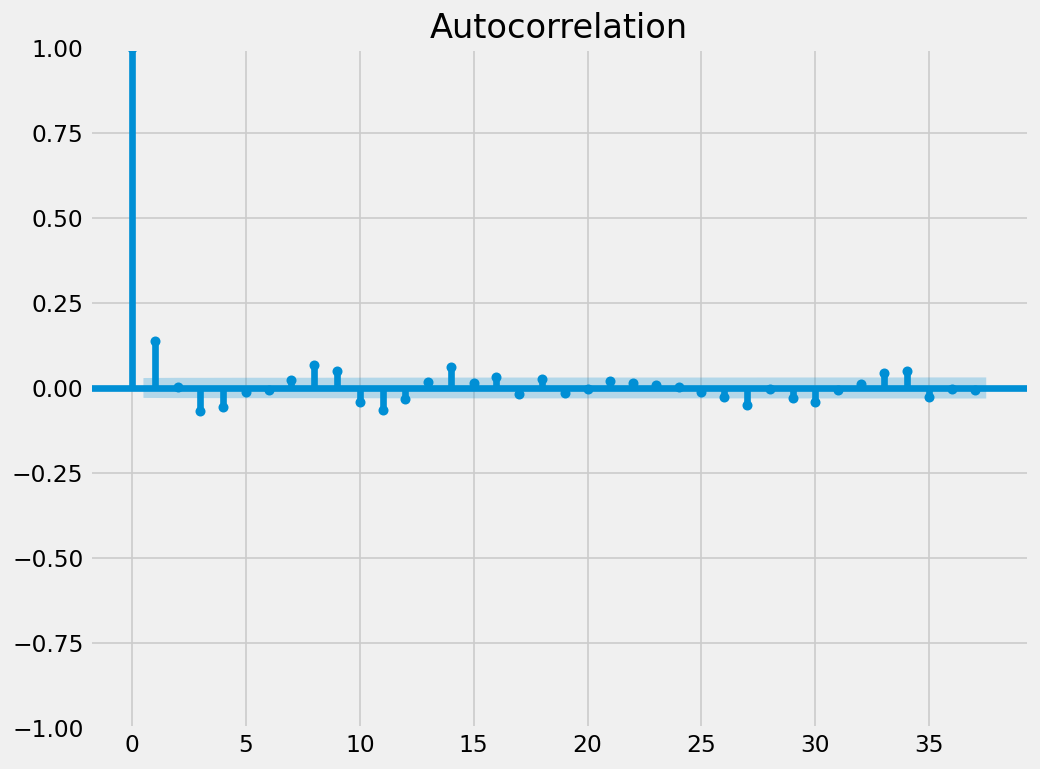

In [32]:
plot_acf(df.Close.diff().dropna())

### Here we can see that 8 of the lag are out of the significance limit so we can say that the optimal value of our q (MA) is 3. 6 in positive side and 2 in negative side

In [33]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df.Close, order = (1,1,6))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4482
Model:                 ARIMA(1, 1, 6)   Log Likelihood               -9622.993
Date:                Sun, 03 Mar 2024   AIC                          19261.986
Time:                        20:31:56   BIC                          19313.247
Sample:                             0   HQIC                         19280.053
                               - 4482                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8692      0.082     10.550      0.000       0.708       1.031
ma.L1         -0.7337      0.083     -8.883      0.000      -0.896      -0.572
ma.L2         -0.1090      0.015     -7.325      0.000      -0.138      -0.080
ma.L3         -0.0717      0.010     -7.294      0.000      -0.091      -0.052
ma.L4          0.0046      0.011      0.433      0.665      -0.016       0.025
ma.L5          0.0450      0.011      4.284      0.000       0.024       0.066
ma.L6          0.0112      0.009      1.272      0.204      -0.006       0.029
sigma2         4.2936      0.039    108.903      0.000       4.216       4.371
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             14269.95
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

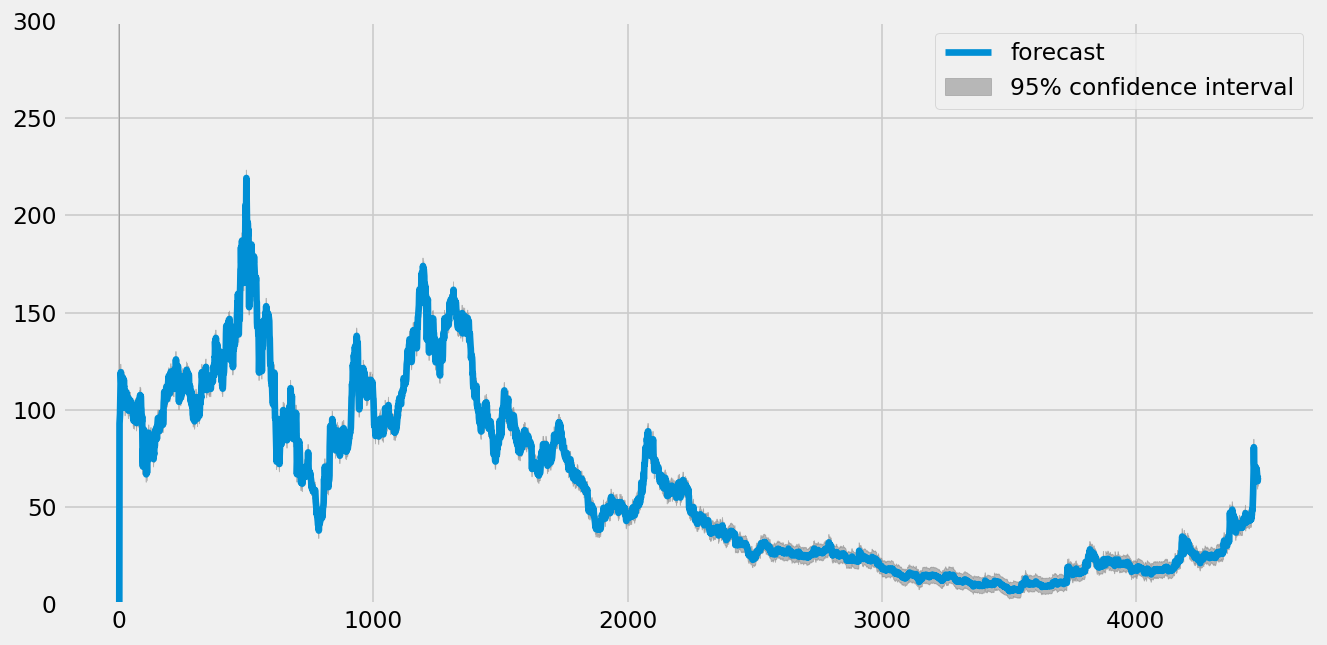

In [37]:
from statsmodels.graphics.tsaplots import plot_predict
import matplotlib.pyplot as plt

# Assuming model_fit is your ARIMAResults object
fig, ax = plt.subplots(figsize=(12, 6))
plot_predict(model_fit, ax=ax, dynamic=False)
ax.set_ylim(0, 300)
plt.show()

In [38]:
normal_values_pred = model_fit.predict()
normal_values_pred

0         0.000000
1        92.900057
2        95.115933
3        97.887436
4       105.751490
           ...    
4477     66.198703
4478     64.386989
4479     63.224224
4480     65.035055
4481     64.726357
Name: predicted_mean, Length: 4482, dtype: float64

In [45]:
predictions = model_fit.predict(len(df), len(df)+50)
predictions

4482    64.316332
4483    64.244345
4484    64.254088
4485    64.257473
4486    64.240837
4487    64.222716
4488    64.206965
4489    64.193274
4490    64.181374
4491    64.171030
4492    64.162039
4493    64.154223
4494    64.147430
4495    64.141526
4496    64.136393
4497    64.131932
4498    64.128054
4499    64.124683
4500    64.121754
4501    64.119207
4502    64.116994
4503    64.115069
4504    64.113397
4505    64.111943
4506    64.110680
4507    64.109581
4508    64.108627
4509    64.107797
4510    64.107076
4511    64.106449
4512    64.105904
4513    64.105430
4514    64.105018
4515    64.104660
4516    64.104349
4517    64.104079
4518    64.103844
4519    64.103640
4520    64.103462
4521    64.103308
4522    64.103173
4523    64.103057
4524    64.102955
4525    64.102867
4526    64.102791
4527    64.102724
4528    64.102666
4529    64.102616
4530    64.102572
4531    64.102534
4532    64.102501
Name: predicted_mean, dtype: float64

<AxesSubplot: >

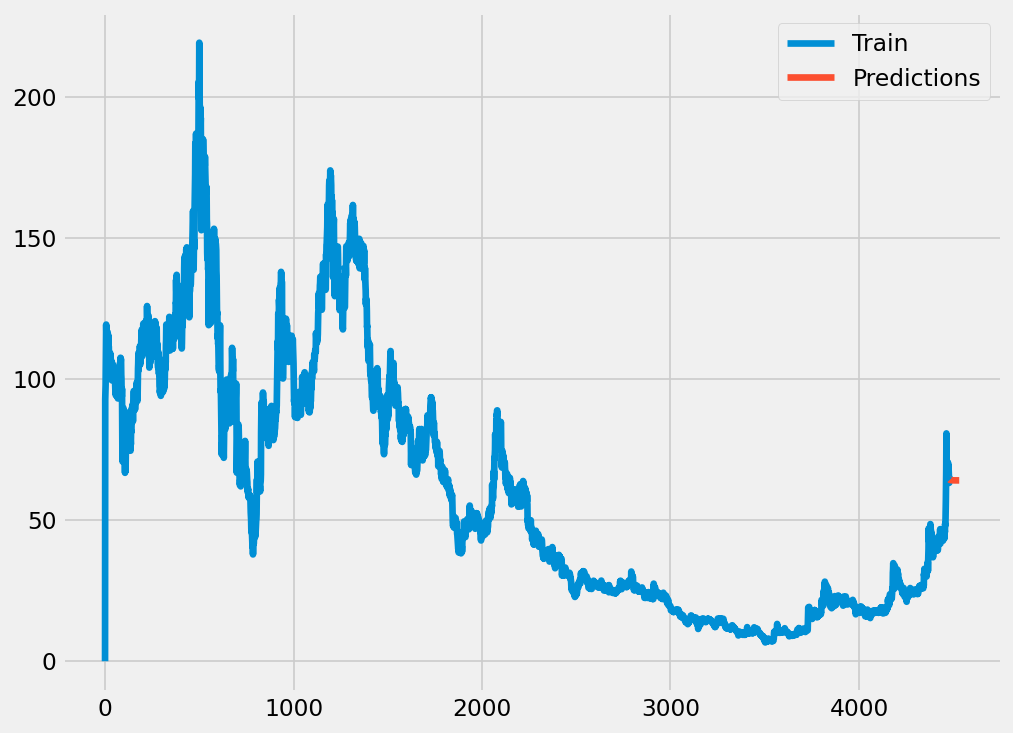

In [46]:
#df['Close'].plot(legend=True, label="Training Data", figsize=(15, 10))
normal_values_pred.plot(legend=True,label="Train")
predictions.plot(legend=True,label="Predictions")

### Now let us implement using Deep Learning Model

In [47]:
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam
from keras.losses import Huber
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional


In [48]:
ndf = yf.download(stk_lbl,start='2021-01-01')
ndf.head()

[*********************100%***********************]  1 of 1 completed


Open   High    Low  Close  Adj Close   Volume
Date                                                      
2021-01-01  10.75  10.85  10.65  10.80      10.80  2686950
2021-01-04  11.05  11.40  10.90  11.30      11.30  7348549
2021-01-05  11.30  11.45  11.00  11.35      11.35  3963696
2021-01-06  11.45  11.45  11.10  11.15      11.15  3841684
2021-01-07  11.25  11.35  11.10  11.15      11.15  2693311

In [49]:
ndf.reset_index(inplace=True)

In [50]:
ndf.drop(['Date','Open','High','Low','Volume','Adj Close'],axis=1,inplace=True)
ndf.head()

Close
0  10.80
1  11.30
2  11.35
3  11.15
4  11.15

In [51]:
scaler = MinMaxScaler()
ndf['Close_normalized'] = scaler.fit_transform(np.array(ndf['Close']).reshape(-1, 1))

In [52]:
ndf.head()

Close  Close_normalized
0  10.80          0.006494
1  11.30          0.013709
2  11.35          0.014430
3  11.15          0.011544
4  11.15          0.011544

In [53]:
def window_data(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        print(i, i + window_size)
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)


#Window size of the time series
window_size = 50

# Split data into train and test sets
train_size = int(len(ndf) * 0.7)
print(train_size)
train_data = ndf.iloc[:train_size]['Close_normalized']
print(train_data)
test_data = ndf.iloc[train_size:]['Close_normalized']
print(test_data)

combined_data = pd.concat([train_data, test_data])

X_train, y_train = window_data(combined_data[:len(train_data)], window_size)
X_test, y_test = window_data(combined_data, window_size)


549
0      0.006494
1      0.013709
2      0.014430
3      0.011544
4      0.011544
         ...   
544    0.194084
545    0.180375
546    0.183261
547    0.183983
548    0.182540
Name: Close_normalized, Length: 549, dtype: float64
549    0.180375
550    0.183983
551    0.186147
552    0.181818
553    0.172439
         ...   
780    0.781385
781    0.762626
782    0.783550
783    0.782828
784    0.779942
Name: Close_normalized, Length: 236, dtype: float64
0 50
1 51
2 52
3 53
4 54
5 55
6 56
7 57
8 58
9 59
10 60
11 61
12 62
13 63
14 64
15 65
16 66
17 67
18 68
19 69
20 70
21 71
22 72
23 73
24 74
25 75
26 76
27 77
28 78
29 79
30 80
31 81
32 82
33 83
34 84
35 85
36 86
37 87
38 88
39 89
40 90
41 91
42 92
43 93
44 94
45 95
46 96
47 97
48 98
49 99
50 100
51 101
52 102
53 103
54 104
55 105
56 106
57 107
58 108
59 109
60 110
61 111
62 112
63 113
64 114
65 115
66 116
67 117
68 118
69 119
70 120
71 121
72 122
73 123
74 124
75 125
76 126
77 127
78 128
79 129
80 130
81 131
82 132
83 133
84 134
85 13

In [54]:
# Reshape the data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [55]:
X_train.shape

(499, 50, 1)

In [56]:
X_test.shape

(735, 50, 1)

In [57]:
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Create column names for the DataFrame
column_names = [f'feature_{i+1}' for i in range(X_test_2d.shape[1])]

# Create DataFrame
cdf = pd.DataFrame(data=X_test_2d, columns=column_names)

# Display the DataFrame
print(df)

           Date       Close
0    2006-01-02   92.900002
1    2006-01-03   94.849998
2    2006-01-04   97.550003
3    2006-01-05  104.900002
4    2006-01-06  113.250000
...         ...         ...
4477 2024-02-27   64.500000
4478 2024-02-28   63.200001
4479 2024-02-29   64.650002
4480 2024-03-01   64.599998
4481 2024-03-02   64.400002

[4482 rows x 2 columns]


In [58]:
cdf = cdf.iloc[499:,:]
cdf.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
499   0.305916   0.297258   0.295815   0.278499   0.284993   0.280664   
500   0.297258   0.295815   0.278499   0.284993   0.280664   0.284271   
501   0.295815   0.278499   0.284993   0.280664   0.284271   0.315296   
502   0.278499   0.284993   0.280664   0.284271   0.315296   0.304473   
503   0.284993   0.280664   0.284271   0.315296   0.304473   0.297980   

     feature_7  feature_8  feature_9  feature_10  ...  feature_41  feature_42  \
499   0.284271   0.315296   0.304473    0.297980  ...    0.223665    0.216450   
500   0.315296   0.304473   0.297980    0.300866  ...    0.216450    0.212843   
501   0.304473   0.297980   0.300866    0.295815  ...    0.212843    0.209957   
502   0.297980   0.300866   0.295815    0.287157  ...    0.209957    0.206349   
503   0.300866   0.295815   0.287157    0.271284  ...    0.206349    0.194084   

     feature_43  feature_44  feature_45  feature_46  feature_47  feature_48  \
499    0.212843    0.209957    0.206349    0.194084    0.180375    0.183261   
500    0.209957    0.206349    0.194084    0.180375    0.183261    0.183983   
501    0.206349    0.194084    0.180375    0.183261    0.183983    0.182540   
502    0.194084    0.180375    0.183261    0.183983    0.182540    0.180375   
503    0.180375    0.183261    0.183983    0.182540    0.180375    0.183983   

     feature_49  feature_50  
499    0.183983    0.182540  
500    0.182540    0.180375  
501    0.180375    0.183983  
502    0.183983    0.186147  
503    0.186147    0.181818  

[5 rows x 50 columns]

In [59]:
X_test_reshaped = cdf.to_numpy()

# Reshape the array to the desired shape
X_test_final = X_test_reshaped.reshape(X_test_reshaped.shape[0], 50, 1)

# Display the shape of the final array
print(X_test_final.shape)

(236, 50, 1)


In [60]:
X_train

array([[[0.0064935 ],
        [0.01370851],
        [0.01443001],
        ...,
        [0.09956709],
        [0.09812409],
        [0.09956709]],

       [[0.01370851],
        [0.01443001],
        [0.011544  ],
        ...,
        [0.09812409],
        [0.09956709],
        [0.09235209]],

       [[0.01443001],
        [0.011544  ],
        [0.011544  ],
        ...,
        [0.09956709],
        [0.09235209],
        [0.0916306 ]],

       ...,

       [[0.30952379],
        [0.31601731],
        [0.3088023 ],
        ...,
        [0.20634919],
        [0.19408367],
        [0.18037518]],

       [[0.31601731],
        [0.3088023 ],
        [0.30591628],
        ...,
        [0.19408367],
        [0.18037518],
        [0.18326116]],

       [[0.3088023 ],
        [0.30591628],
        [0.2972583 ],
        ...,
        [0.18037518],
        [0.18326116],
        [0.18398268]]])

In [61]:
X_test

array([[[0.0064935 ],
        [0.01370851],
        [0.01443001],
        ...,
        [0.09956709],
        [0.09812409],
        [0.09956709]],

       [[0.01370851],
        [0.01443001],
        [0.011544  ],
        ...,
        [0.09812409],
        [0.09956709],
        [0.09235209]],

       [[0.01443001],
        [0.011544  ],
        [0.011544  ],
        ...,
        [0.09956709],
        [0.09235209],
        [0.0916306 ]],

       ...,

       [[0.49567099],
        [0.52380953],
        [0.46103894],
        ...,
        [0.80735933],
        [0.78138526],
        [0.76262626]],

       [[0.52380953],
        [0.46103894],
        [0.47979794],
        ...,
        [0.78138526],
        [0.76262626],
        [0.78354979]],

       [[0.46103894],
        [0.47979794],
        [0.47041847],
        ...,
        [0.76262626],
        [0.78354979],
        [0.78282824]]])

In [62]:
X_train.shape

(499, 50, 1)

In [63]:
X_test.shape

(735, 50, 1)

In [64]:
def lr_scheduler(epoch, lr):
    return lr * np.exp(-0.1)
lr_callback = LearningRateScheduler(lr_scheduler)

In [65]:
# Define the model
model = Sequential()

# Conv1D layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(50, 1)))
model.add(Dropout(0.2))  # Adding dropout regularization

# Bidirectional Stacked LSTM layers
model.add(Bidirectional(LSTM(64, return_sequences=True))) # return_sequences=True to feed the output to the next LSTM layer
model.add(Dropout(0.2))  # Adding dropout regularization
model.add(Bidirectional(LSTM(64, return_sequences=False))) # return_sequences=False because we only need the output of the last LSTM cell
model.add(Dropout(0.2))  # Adding dropout regularization

# Dense layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=Huber(delta=1.0))  # you can adjust the learning rate as needed

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 64)            256       
                                                                 
 dropout (Dropout)           (None, 48, 64)            0         
                                                                 
 bidirectional (Bidirection  (None, 48, 128)           66048     
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 128)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 128)               

Epoch 1/50

16/16 [==============================] - 14s 252ms/step - loss: 0.0028 - val_loss: 0.0057 - lr: 9.0484e-04
Epoch 2/50
16/16 [==============================] - 2s 121ms/step - loss: 7.6484e-04 - val_loss: 0.0043 - lr: 8.1873e-04
Epoch 3/50
16/16 [==============================] - 2s 118ms/step - loss: 4.9657e-04 - val_loss: 0.0016 - lr: 7.4082e-04
Epoch 4/50
16/16 [==============================] - 2s 127ms/step - loss: 3.6401e-04 - val_loss: 8.6572e-04 - lr: 6.7032e-04
Epoch 5/50
16/16 [==============================] - 2s 117ms/step - loss: 3.5416e-04 - val_loss: 6.8778e-04 - lr: 6.0653e-04
Epoch 6/50
16/16 [==============================] - 2s 118ms/step - loss: 3.2195e-04 - val_loss: 7.7834e-04 - lr: 5.4881e-04
Epoch 7/50
16/16 [==============================] - 2s 123ms/step - loss: 2.7629e-04 - val_loss: 8.7917e-04 - lr: 4.9659e-04
Epoch 8/50
16/16 [==============================] - 2s 120ms/step - loss: 2.4485e-04 - val_loss: 8.4390e-04 - lr: 4.4933e-04
Epoch 9/50
16/

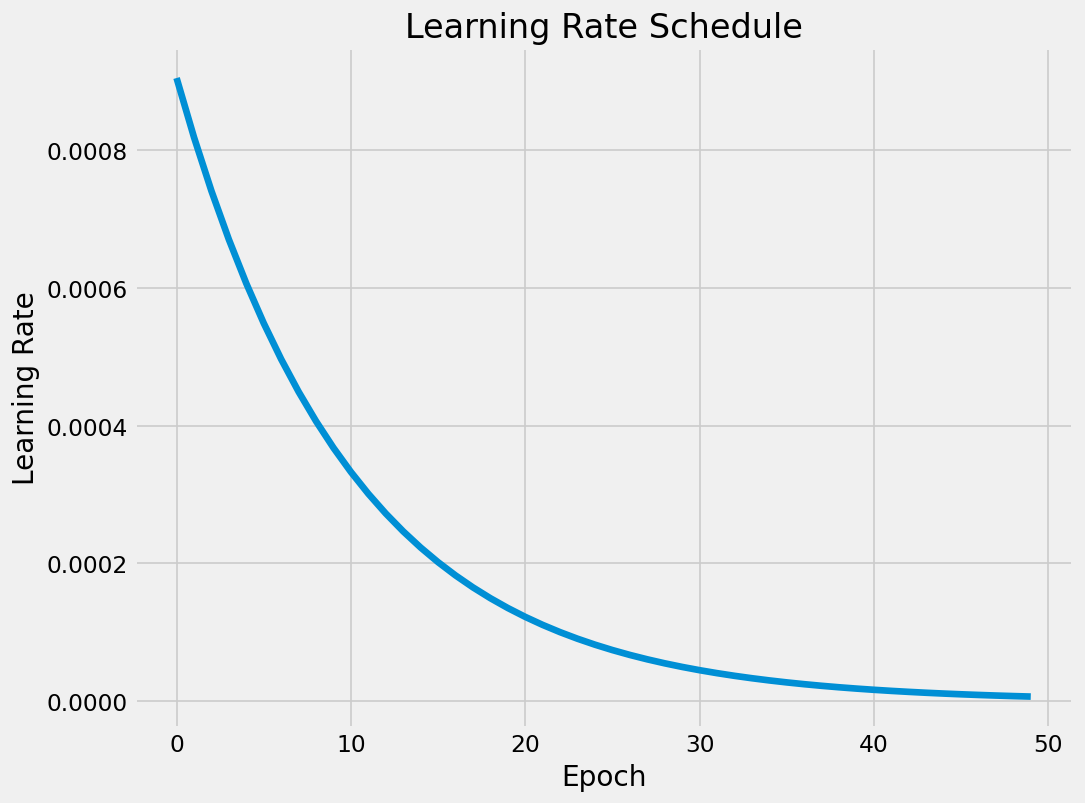

In [66]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_callback])

# Plot learning rate schedule
plt.plot(history.history['lr'])
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()

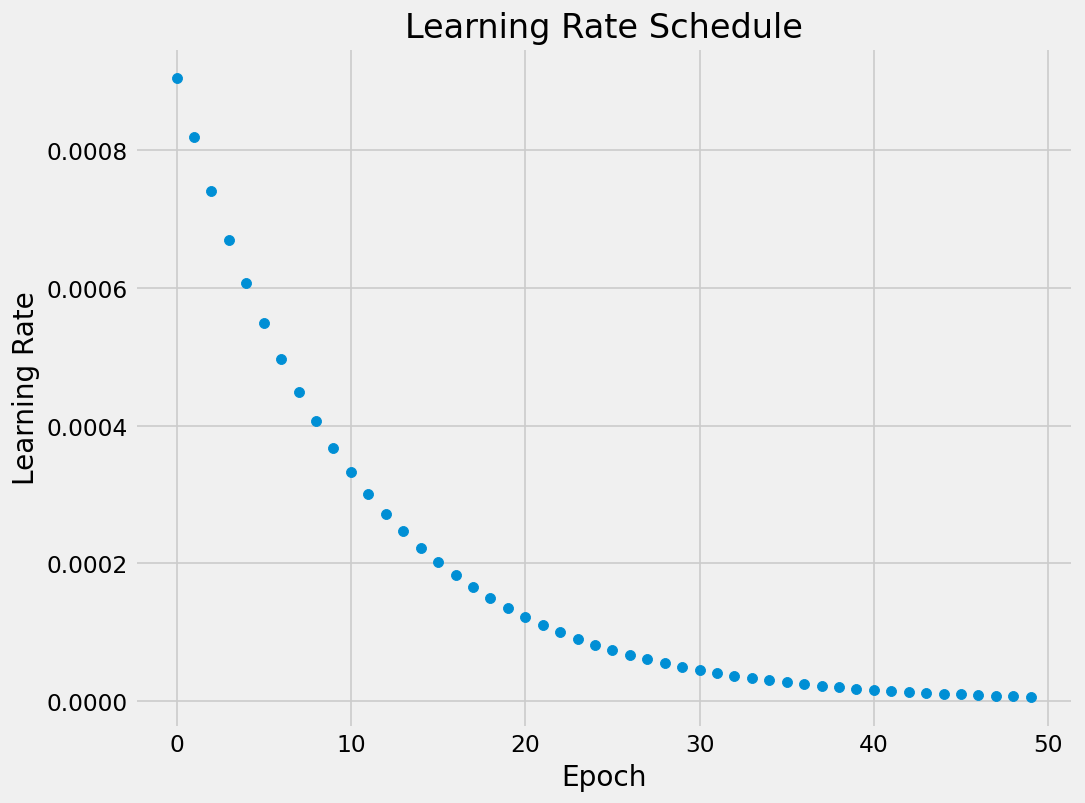

In [67]:
plt.scatter(range(len(history.history['lr'])), history.history['lr'])
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()

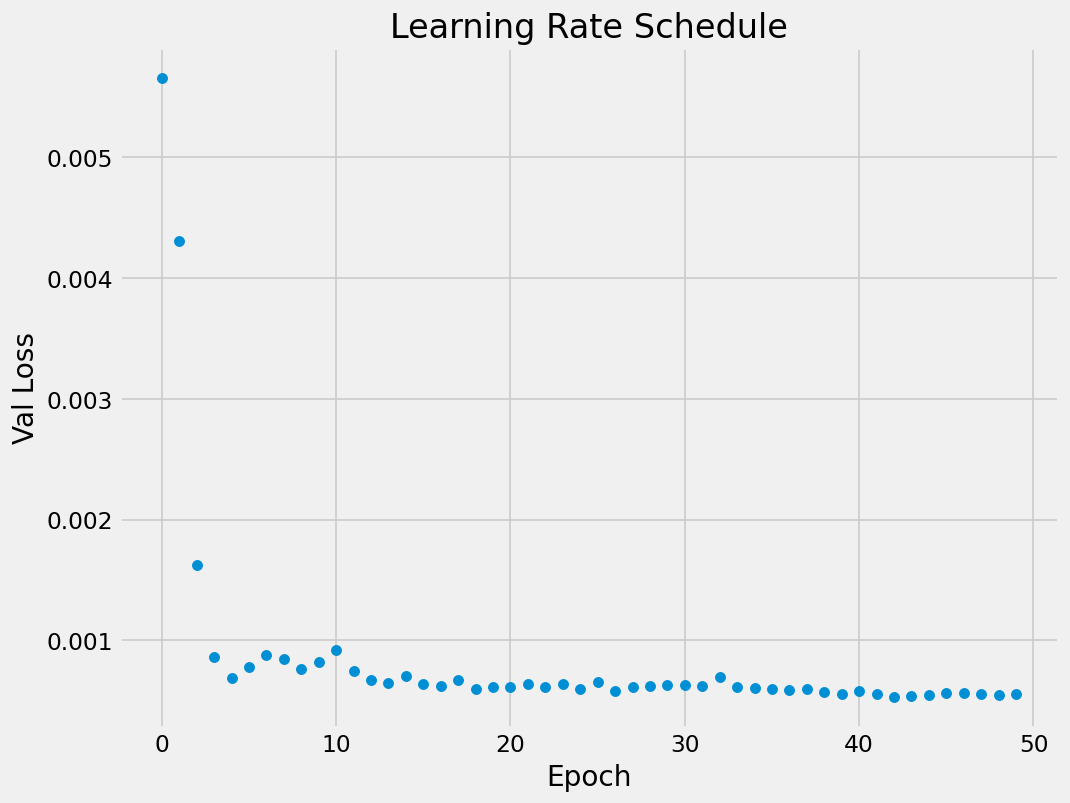

In [71]:
plt.scatter(range(len(history.history['val_loss'])), history.history['val_loss'])
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Val Loss')
plt.show()

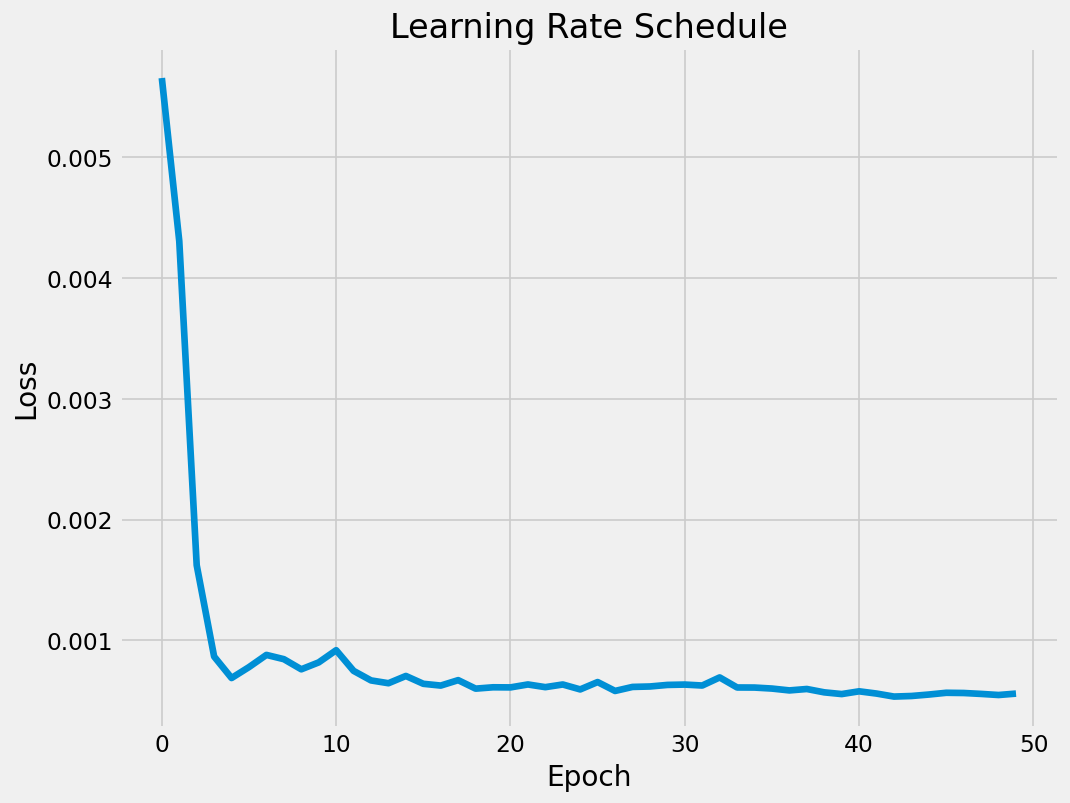

In [72]:
plt.plot(history.history['val_loss'])
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

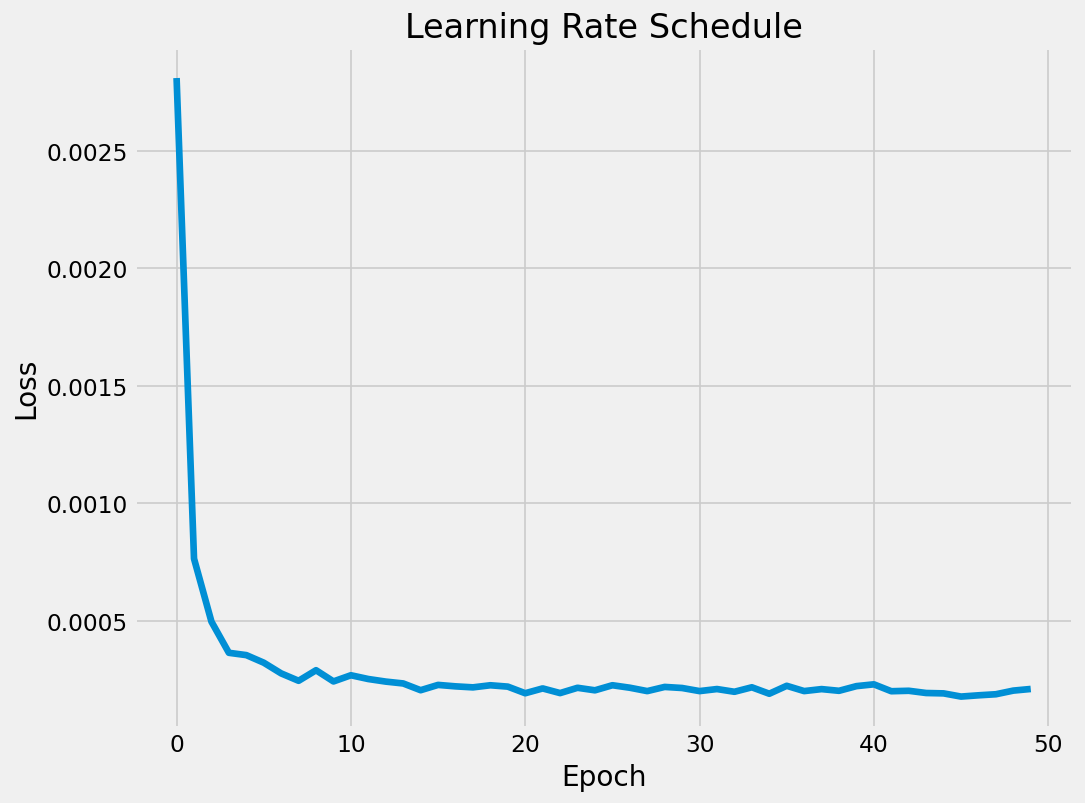

In [73]:
plt.plot(history.history['loss'])
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [74]:
history.history['lr'][10]

0.00033287107

In [75]:
history.history['lr'][13]

0.00024659696

In [76]:
model.compile(optimizer=Adam(learning_rate=history.history['lr'][10]), loss=Huber(delta=1.0))

In [77]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predictions = model.predict(X_test)

Epoch 1/50
16/16 [==============================] - 13s 247ms/step - loss: 2.3778e-04 - val_loss: 4.6553e-04
Epoch 2/50
16/16 [==============================] - 2s 117ms/step - loss: 2.0780e-04 - val_loss: 6.6247e-04
Epoch 3/50
16/16 [==============================] - 2s 115ms/step - loss: 2.0493e-04 - val_loss: 6.9610e-04
Epoch 4/50
16/16 [==============================] - 2s 119ms/step - loss: 1.8513e-04 - val_loss: 4.4396e-04
Epoch 5/50
16/16 [==============================] - 2s 117ms/step - loss: 1.9873e-04 - val_loss: 5.0915e-04
Epoch 6/50
16/16 [==============================] - 2s 117ms/step - loss: 1.8333e-04 - val_loss: 4.8859e-04
Epoch 7/50
16/16 [==============================] - 2s 116ms/step - loss: 1.7768e-04 - val_loss: 5.8383e-04
Epoch 8/50
16/16 [==============================] - 2s 125ms/step - loss: 1.8644e-04 - val_loss: 3.8516e-04
Epoch 9/50
16/16 [==============================] - 2s 117ms/step - loss: 1.4691e-04 - val_loss: 4.6612e-04
Epoch 10/50
16/16 [========

In [78]:
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)) 

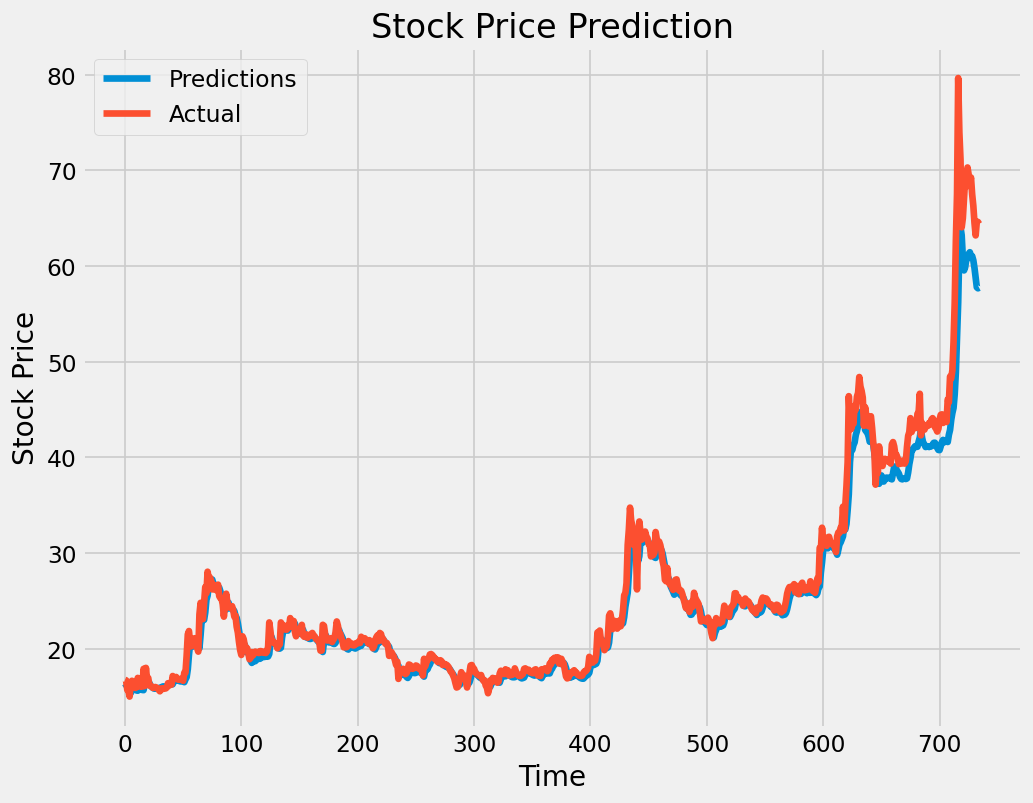

In [79]:
plt.plot(predictions_inv, label='Predictions')
plt.plot(y_test_inv, label='Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

1/1 [==============================] - 0s 44ms/step


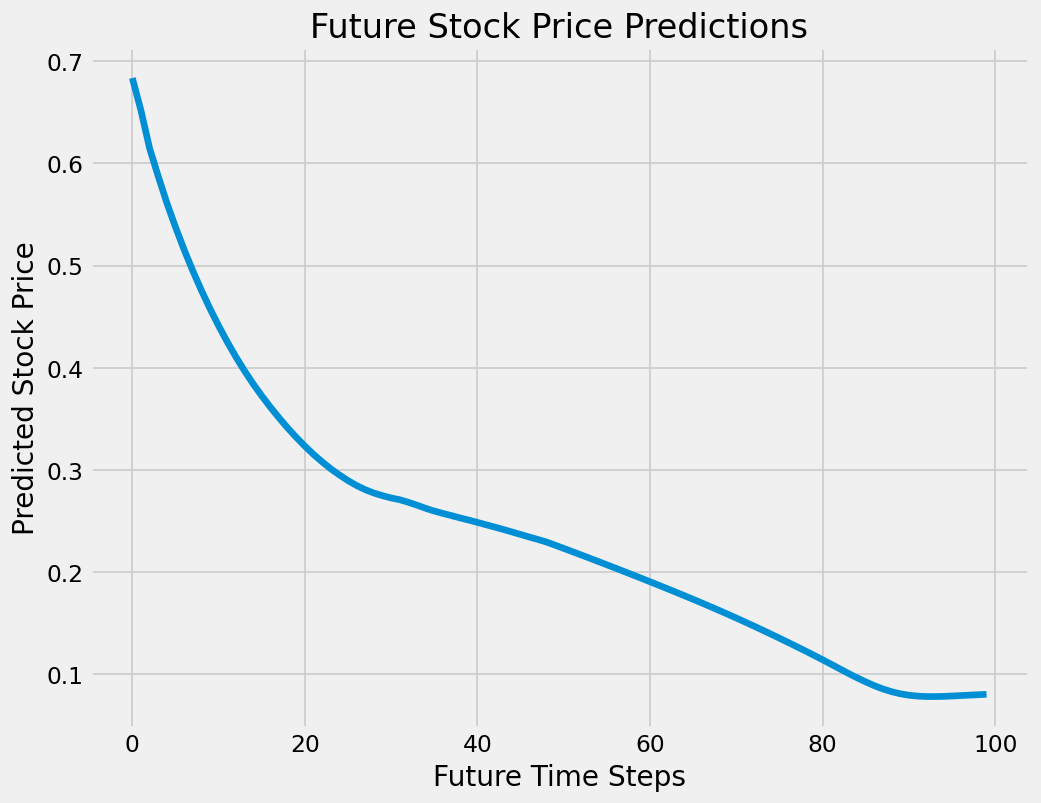

In [80]:
# Initialize a list to store future predictions
future_predictions = []

# Initial input data (use the last sequence from your test data)
input_data = X_test[-1]  # Assuming X_test is your test data and it's already preprocessed

# Define the number of future time steps to predict
num_steps = 100  # Change this value based on how many future steps you want to predict

for _ in range(num_steps):
    # Reshape input_data to match model input shape
    input_data_reshaped = input_data.reshape(1, input_data.shape[0], input_data.shape[1])
    
    # Predict the next time step
    next_step_prediction = model.predict(input_data_reshaped)
    
    # Store the prediction
    future_predictions.append(next_step_prediction[0, 0])  # Assuming your model outputs a single value
    
    # Update input_data by appending the prediction and discarding the oldest data point
    input_data = np.concatenate([input_data[1:], next_step_prediction], axis=0)

# Plot the future predictions
plt.plot(future_predictions)
plt.xlabel('Future Time Steps')
plt.ylabel('Predicted Stock Price')
plt.title('Future Stock Price Predictions')
plt.show()

In [81]:
future_predictions

[0.683736,
 0.6519058,
 0.6149514,
 0.5874909,
 0.56134945,
 0.5377069,
 0.5155925,
 0.4949866,
 0.47576684,
 0.4578019,
 0.44097888,
 0.42521948,
 0.4105371,
 0.39685264,
 0.38414136,
 0.3723312,
 0.36125714,
 0.35081175,
 0.34092137,
 0.33169478,
 0.3230443,
 0.31497055,
 0.30766508,
 0.30088177,
 0.29482698,
 0.28929138,
 0.28443614,
 0.28038964,
 0.2771007,
 0.2745181,
 0.27228236,
 0.27056107,
 0.26803505,
 0.26519838,
 0.26214358,
 0.2594581,
 0.25712794,
 0.25496122,
 0.252716,
 0.25058925,
 0.2483481,
 0.24604349,
 0.24378368,
 0.24140641,
 0.23898304,
 0.23651914,
 0.2340469,
 0.23166367,
 0.22911288,
 0.22605465,
 0.2228801,
 0.21971488,
 0.2165156,
 0.21330582,
 0.2100709,
 0.2068148,
 0.2035362,
 0.20023693,
 0.19691712,
 0.19357644,
 0.19021408,
 0.18682823,
 0.18341652,
 0.17997527,
 0.17650004,
 0.17298497,
 0.16942428,
 0.16581285,
 0.1621479,
 0.15842755,
 0.15464999,
 0.15081541,
 0.14692265,
 0.1429728,
 0.13896643,
 0.13490574,
 0.13079345,
 0.12663016,
 0.12241381,

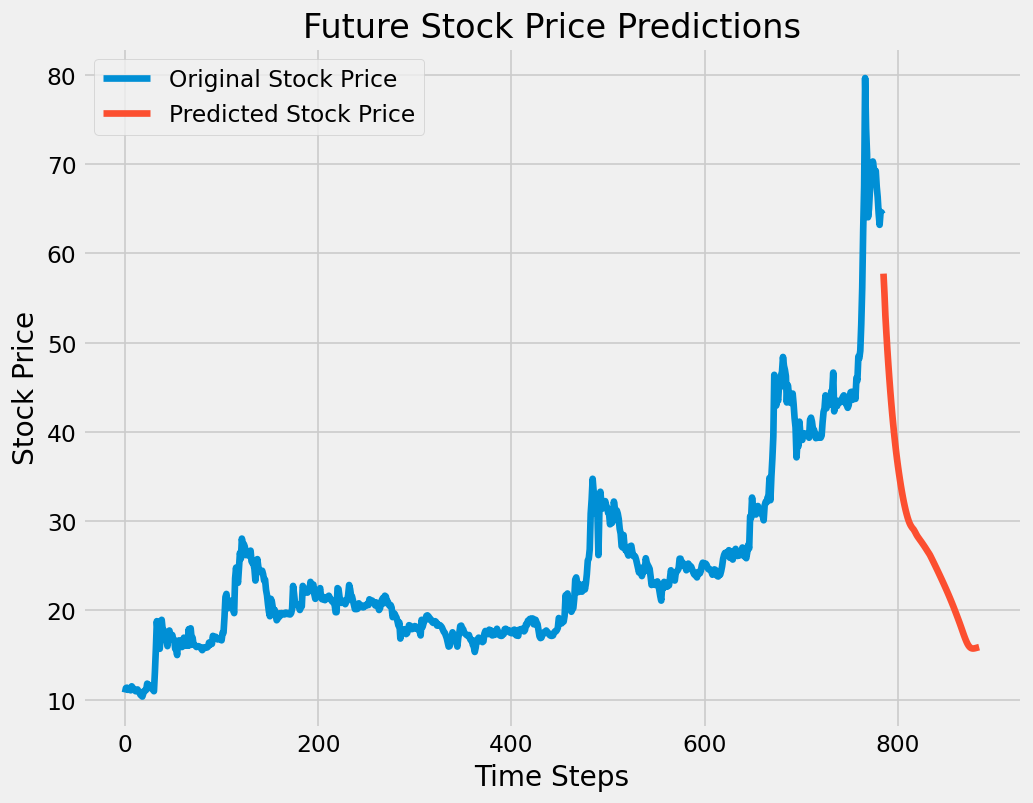

In [84]:
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)) 

# Assuming ndf contains the original stock prices
plt.plot(ndf['Close'], label='Original Stock Price')
plt.plot(np.arange(len(ndf['Close']), len(ndf['Close']) + len(future_predictions_inv)), future_predictions_inv, label='Predicted Stock Price')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('Future Stock Price Predictions')
plt.legend()
plt.show()


In [92]:

model.save('model.h5')

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [97]:
from keras.models import load_model

# Load the model
loaded_model = load_model('model.h5')

# Get the weights and biases of each layer in the loaded model
for layer in loaded_model.layers:
    if hasattr(layer, 'get_weights'):
        weights = layer.get_weights()
        if weights:  # Check if weights are not empty
            print(f'Layer: {layer.name}')
            print(f'Weights shape: {weights[0].shape}')
            print(f'Biases shape: {weights[1].shape}')
            print('Weights:', weights[0])
            print('Biases:', weights[1])
            print()
        else:
            print(f'Layer {layer.name} has no weights and biases.')

Layer: conv1d
Weights shape: (3, 1, 64)
Biases shape: (64,)
Weights: [[[-1.14929676e-01  2.47737803e-02  5.96021526e-02  5.83800115e-02
    1.29577383e-01  6.82868958e-02 -1.52407169e-01 -4.42095567e-03
    1.32706359e-01 -8.26277360e-02 -1.09185129e-02  8.02645311e-02
   -4.56254184e-02  5.52803762e-02  1.22165270e-01 -9.65823885e-03
    7.81095028e-02 -1.31575897e-01  1.12759084e-01 -7.66024068e-02
    1.47591829e-02 -9.84458253e-02  1.33017572e-02  3.98088992e-02
    3.12730670e-02 -6.33499771e-03  8.78751427e-02  1.50788769e-01
    1.32422626e-01 -1.79629177e-02 -1.29875615e-01 -1.57045111e-01
   -7.58066103e-02  5.62976580e-03 -4.03221287e-02  1.34431601e-01
    1.69385433e-01 -1.66000322e-01  1.19239517e-01 -5.81392497e-02
   -5.79773188e-02 -1.01370893e-01 -3.42473947e-03  1.50355687e-02
   -3.46376225e-02 -1.54003799e-01 -2.29673944e-02 -2.41368320e-02
    1.54942870e-01  4.53402847e-02  4.54386957e-02  8.01314116e-02
   -1.66494355e-01  1.98139437e-02  1.75363049e-02  7.934262